# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

ANSWER:

Given how vague the administrator's question is (providing no specific information on what constitutes "more expensive drugs"), I think both visualization provide useful information. The histogram allows us to assess how many of the drugs fall into each price bins across the full range of prices, allowing us to determine based on the overall distribution what we want to classify as  "more expensive drugs" and giving us a number relative to price ranges of our choosing. The boxplot is helpful in defining those expensive drugs for us - the dots on the upper end are high outliers, meaning they fall above the "expected" range of prices based on the distribution of all the drugs. You can also see the distribution of the data in the box and whisker portion of the plot, with the data above the median showing a wider spread than the lower half of the data. I would lean towards the boxplot here because it provides us with two data-driven ways to classify which drugs are more expensive (either using everything above the Q3 upper limit or the outliers only). What I pass up in doing that is the more clear illustration that many of the drugs are in the lower range of prices. At least for me, my brain automatically equates the smaller size of the range below the median with less drugs being in that range even though that is not an accurate interpretation of a boxplot. 

For both plots, I would add clear axis labels, and a title with the take-home point. I would also probably color the outlier points on the boxplot in red since they are the points we likely want to focus on to answer the question posed here. That makes them easier to highlight clearly in a figure caption or presentation.

In [4]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

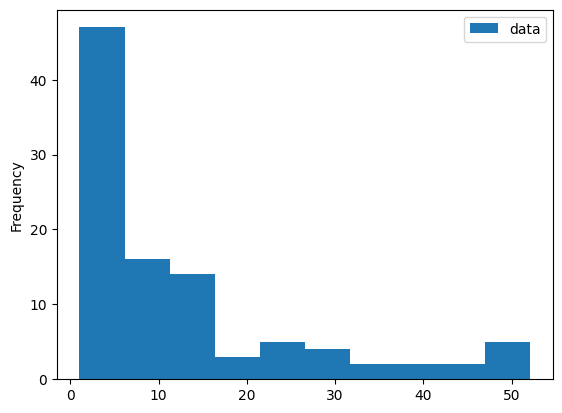

In [5]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

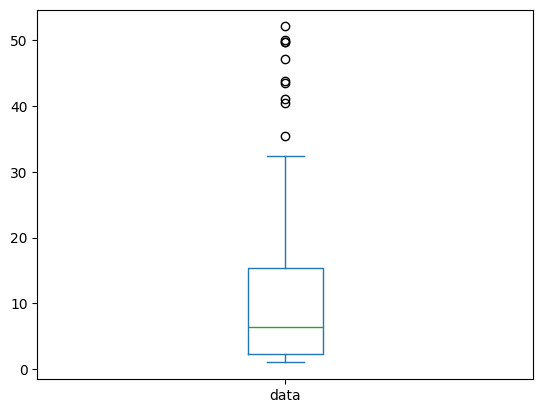

In [6]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [7]:
df = pd.read_csv("Heart_disease_statlog.csv")

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [9]:
# convert categorical variables from numeric
df["sex"] = df["sex"].astype("category")
df["cp"] = df["cp"].astype("category")
df["fbs"] = df["fbs"].astype("category")
df["restecg"] = df["restecg"].astype("category")
df["exang"] = df["exang"].astype("category")
df["slope"] = df["slope"].astype("category")
df["ca"] = df["ca"].astype("category")
df["thal"] = df["thal"].astype("category")
df["target"] = df["target"].astype("category")

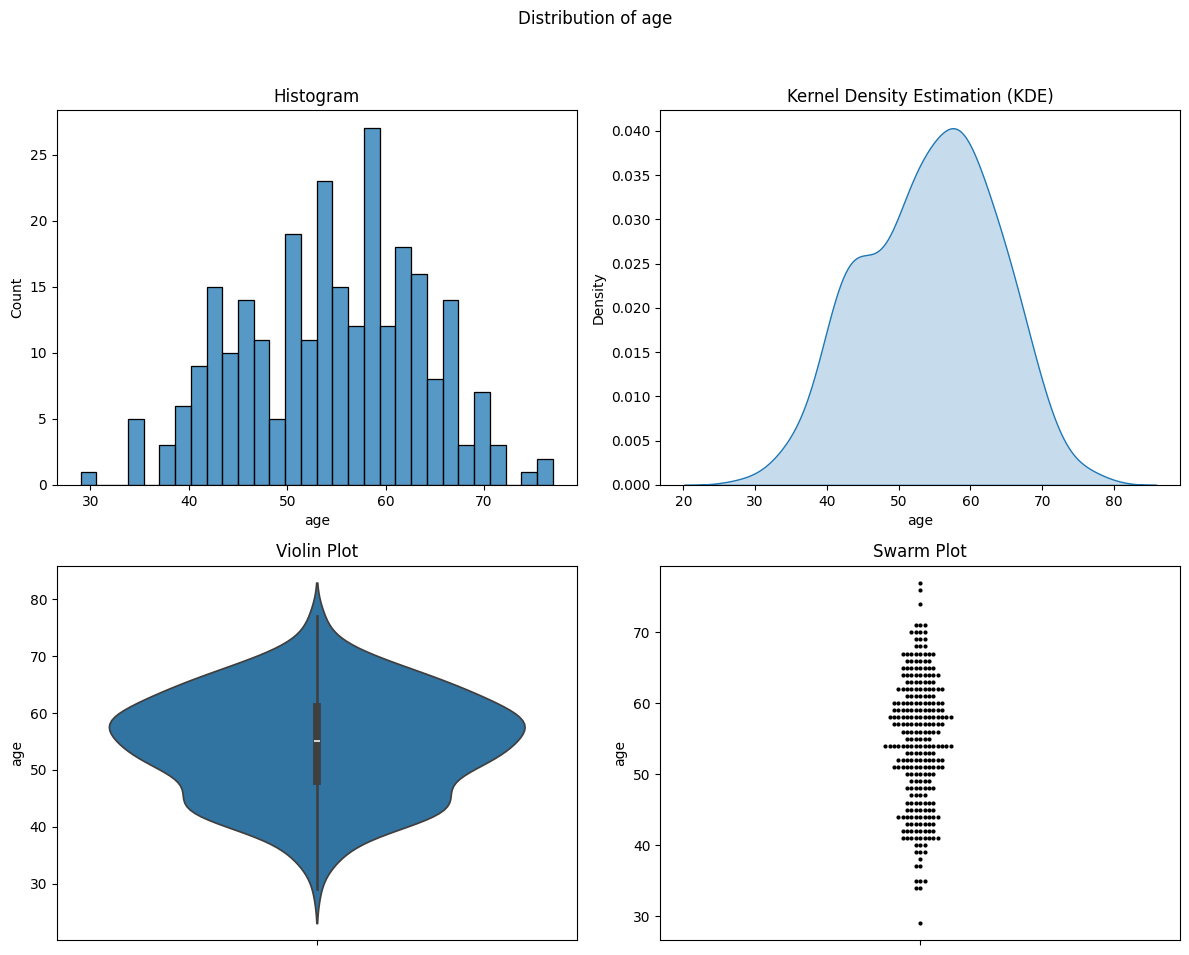

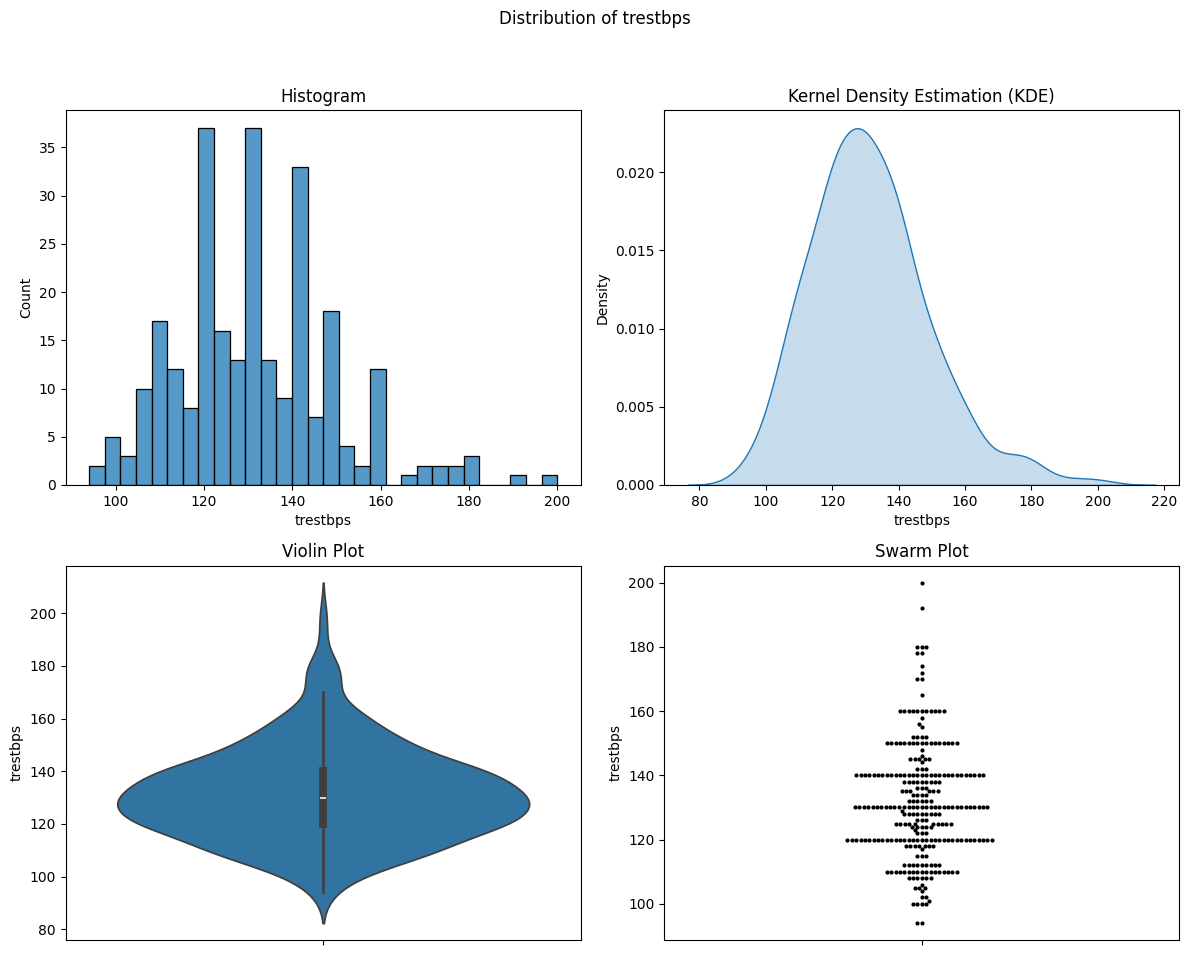

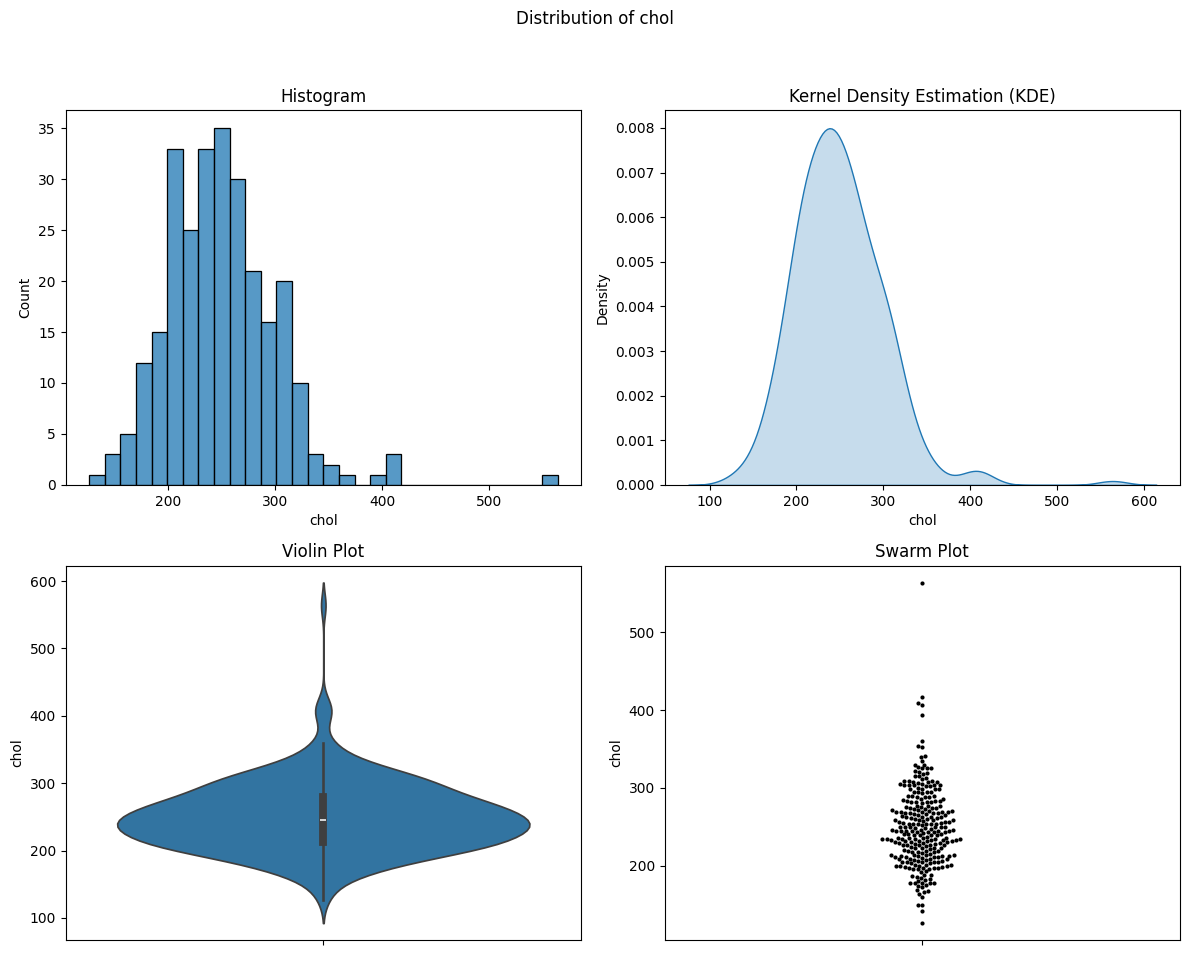

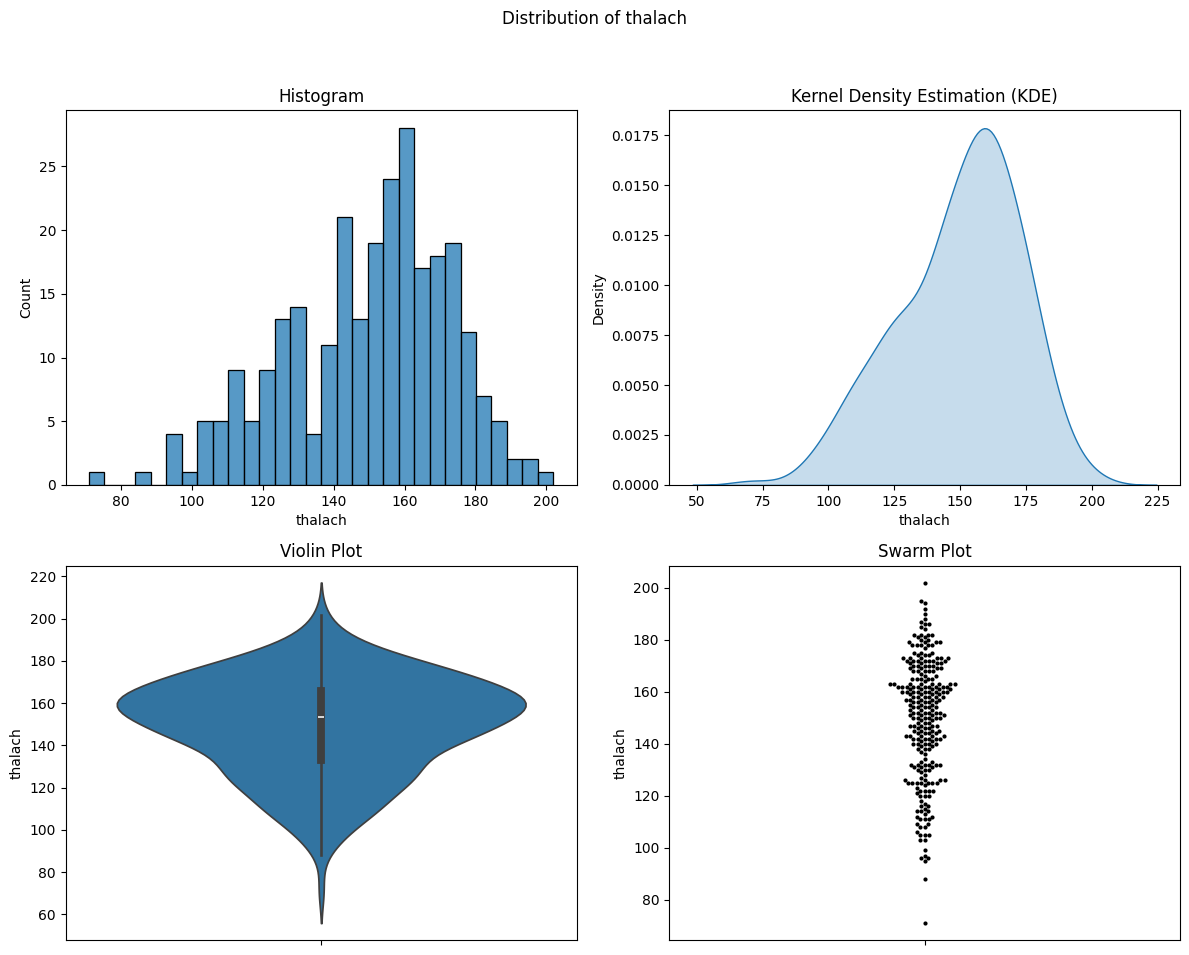

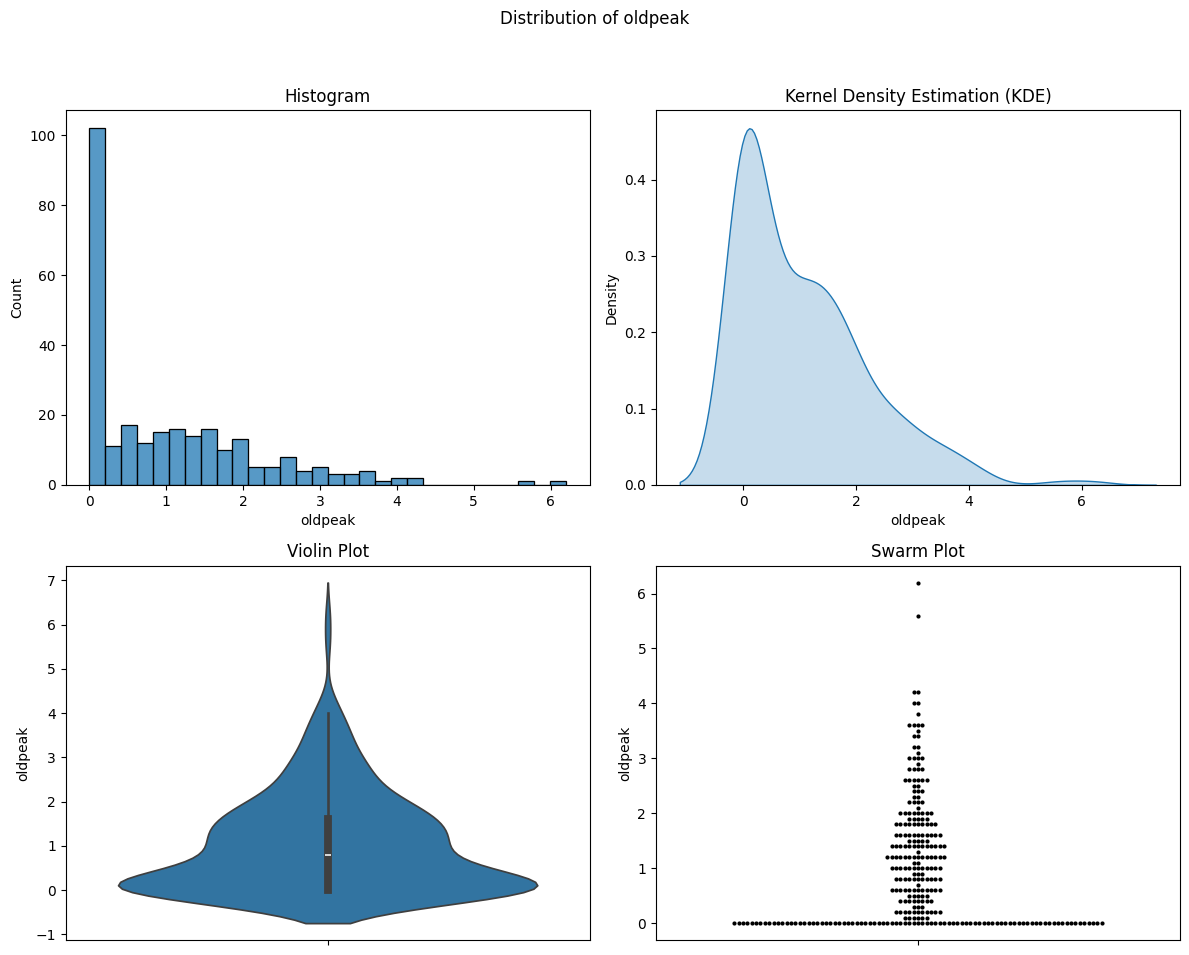

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_columns = df.select_dtypes(include=["number"]).columns

# Set up the plotting layout
for col in numeric_columns:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(df[col], bins=30, kde=False, ax=axes[0, 0])
    axes[0, 0].set_title("Histogram")

    # KDE Plot
    sns.kdeplot(df[col], fill=True, ax=axes[0, 1])
    axes[0, 1].set_title("Kernel Density Estimation (KDE)")

    # Violin Plot
    sns.violinplot(y=df[col], ax=axes[1, 0])
    axes[1, 0].set_title("Violin Plot")

    # Swarm Plot (handling large datasets)
    sns.swarmplot(y=df[col], ax=axes[1, 1], color="black", size=3)
    axes[1, 1].set_title("Swarm Plot")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


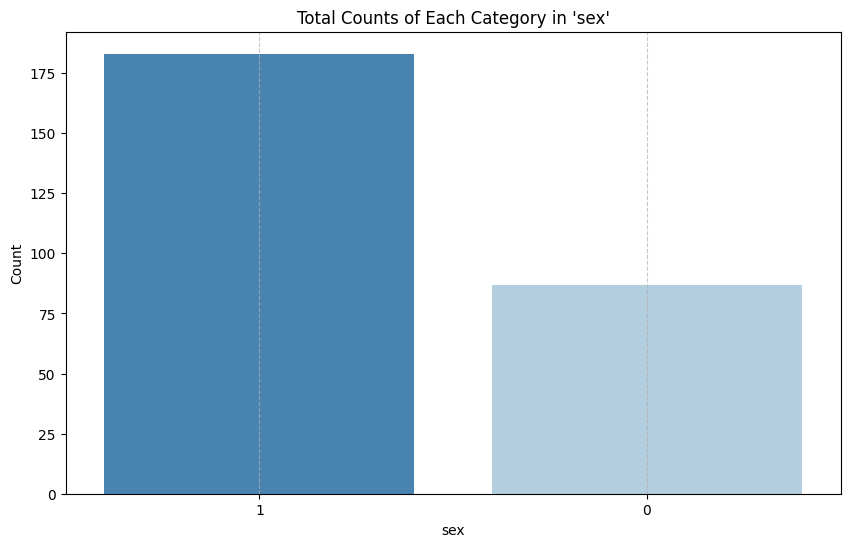

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


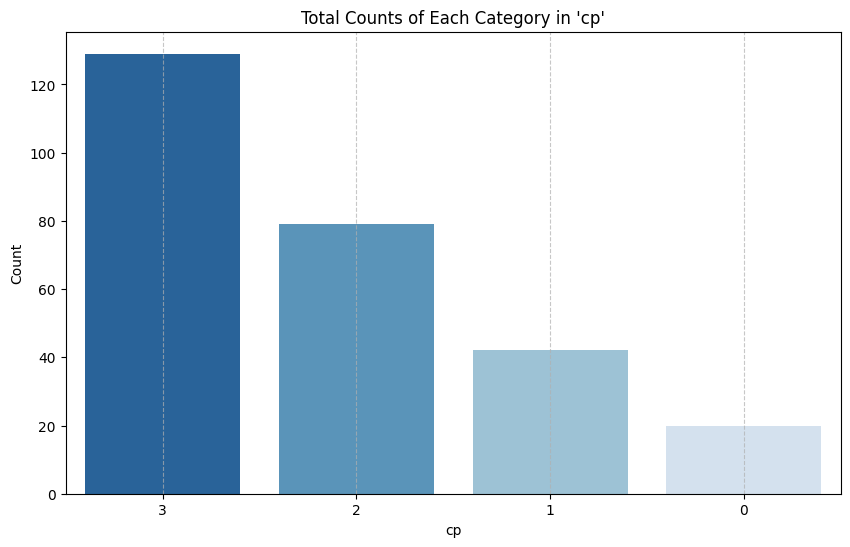

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


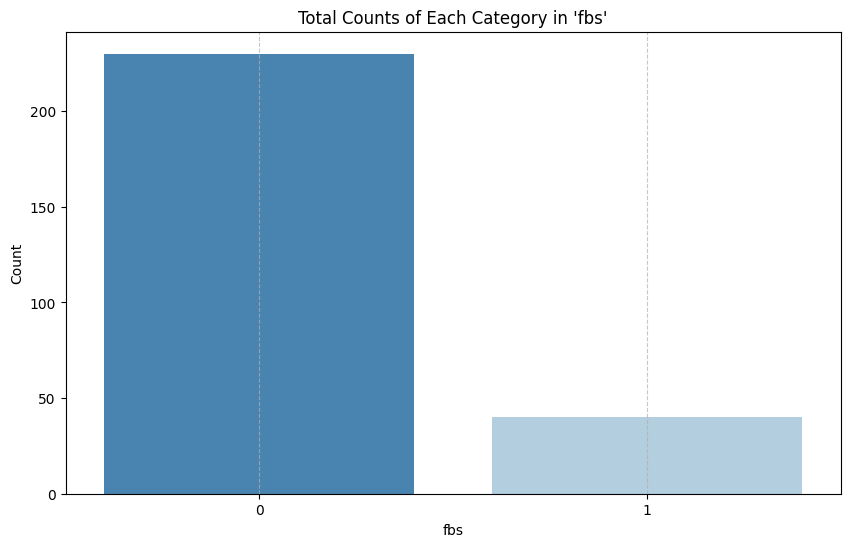

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


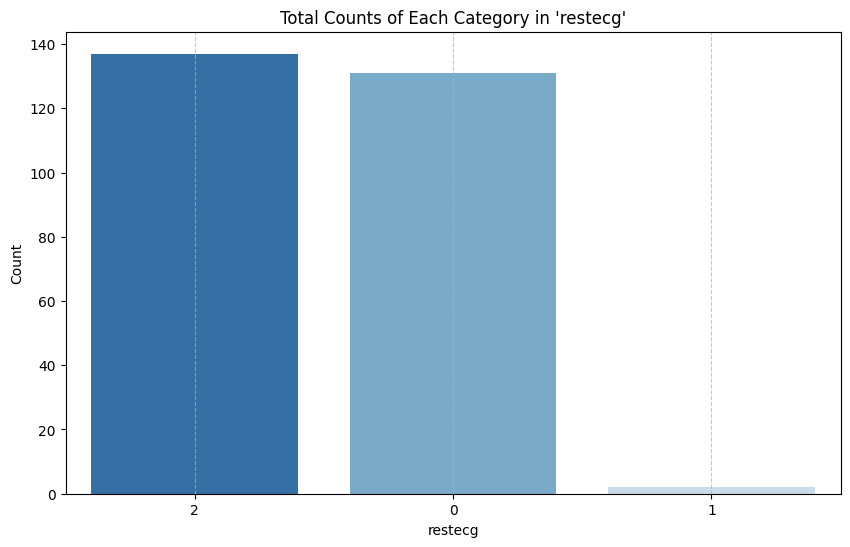

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


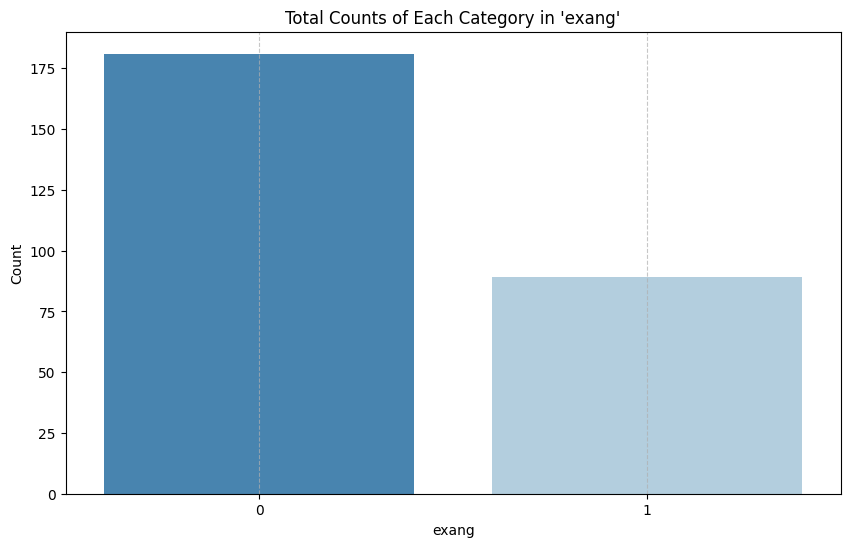

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


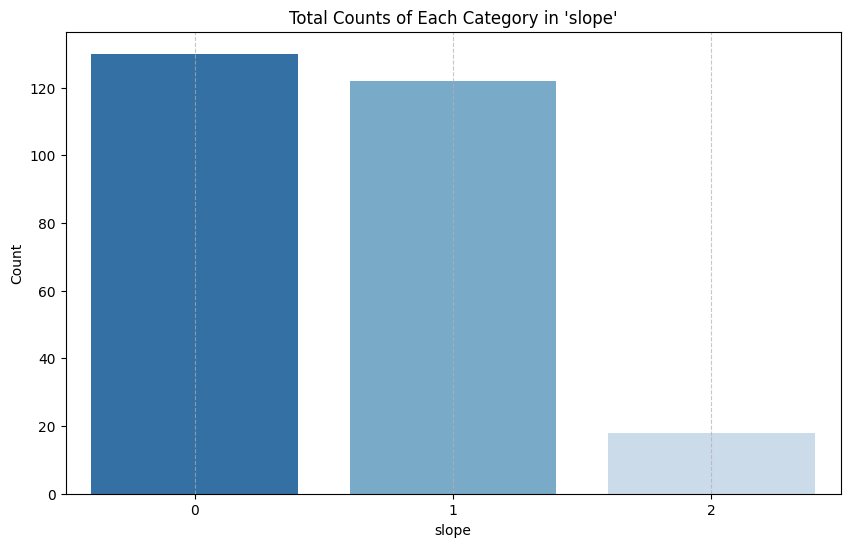

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


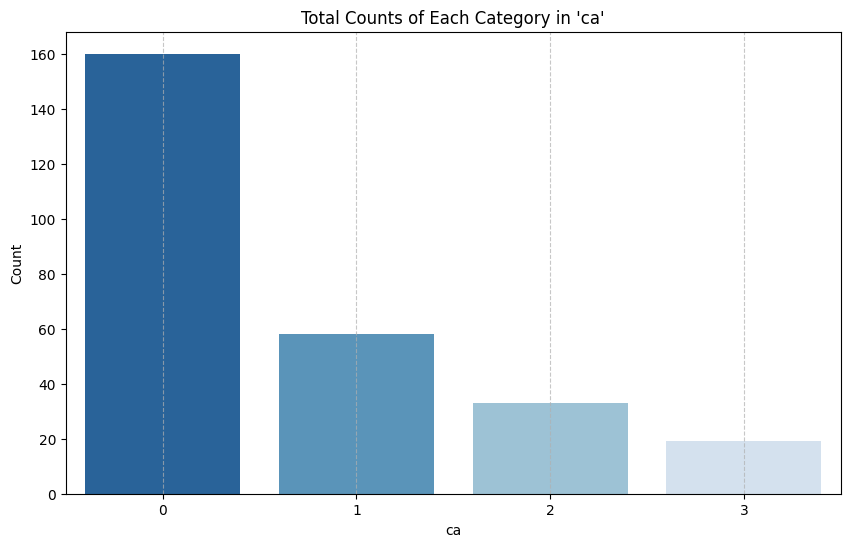

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


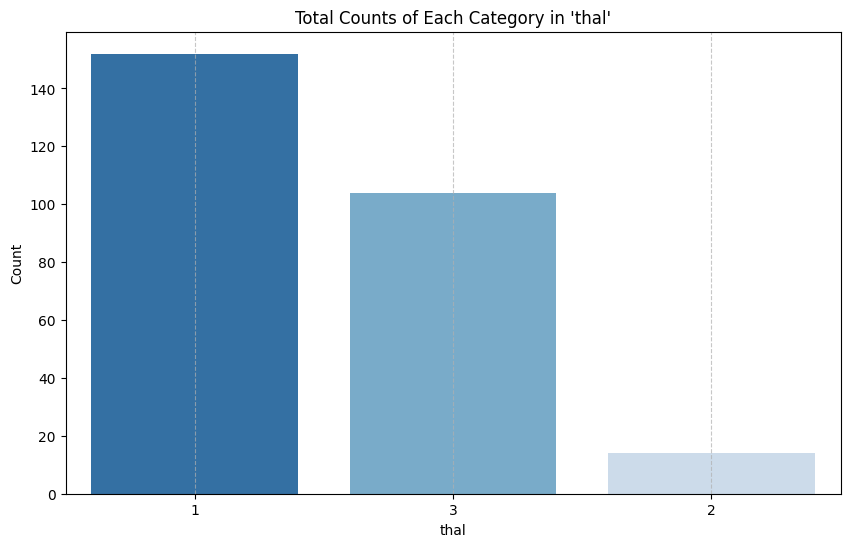

/tmp/ipykernel_60765/2662897910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")


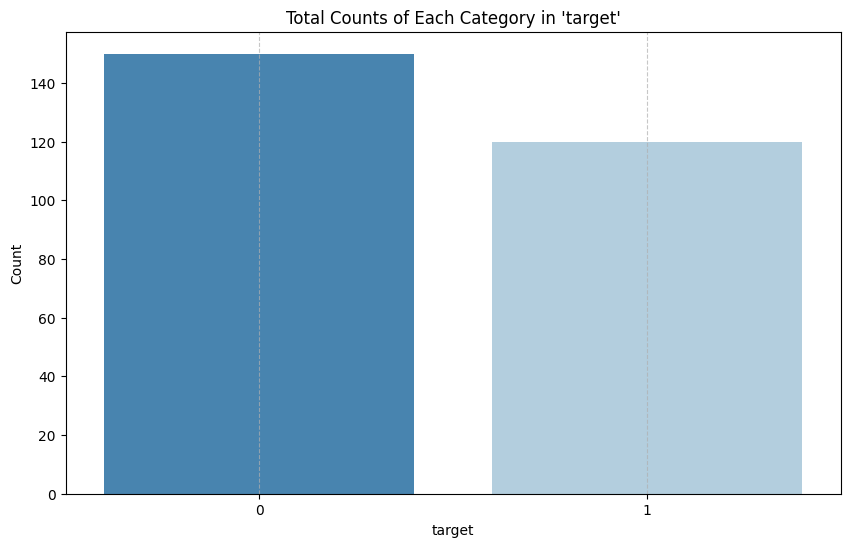

In [11]:
# Select all categorical columns
categorical_columns = df.select_dtypes(include=["category"]).columns

# Loop through each categorical column and generate a count plot
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Blues_r")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.title(f"Total Counts of Each Category in '{col}'")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns

# Compute mean, median, and mode for each numeric column
summary_stats = pd.DataFrame({
    "Mean": df[numeric_columns].mean(),
    "Median": df[numeric_columns].median(),
    "Mode": df[numeric_columns].mode().iloc[0]  # Take first mode value if multiple exist
})

summary_stats["StdDev"] = df[numeric_columns].std()
summary_stats["25th Percentile"] = df[numeric_columns].quantile(0.25)
summary_stats["75th Percentile"] = df[numeric_columns].quantile(0.75)

print(summary_stats)

                Mean  Median   Mode     StdDev  25th Percentile  \
age        54.433333    55.0   54.0   9.109067             48.0   
trestbps  131.344444   130.0  120.0  17.861608            120.0   
chol      249.659259   245.0  234.0  51.686237            213.0   
thalach   149.677778   153.5  162.0  23.165717            133.0   
oldpeak     1.050000     0.8    0.0   1.145210              0.0   

          75th Percentile  
age                  61.0  
trestbps            140.0  
chol                280.0  
thalach             166.0  
oldpeak               1.6  


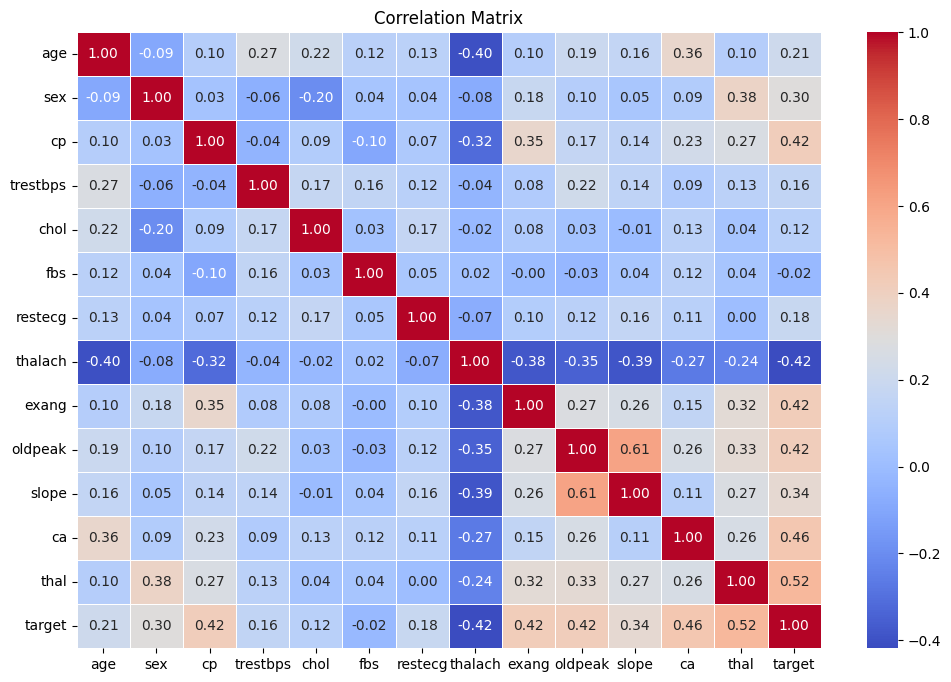

In [13]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

CONCLUSIONS:

From this preliminary set of visualizations, we can see that the sample has about 2x as many men as women, they are an average of 54.4 years old (SD: 9.1 years), most people have normal blood sugar, close to half were asymptomatic for chest pain, and close to have had heart disease (target = 1). Looking at the correlation matrix, the strongest correlation we see is between slope and old peak, which makes sense because both are related to the ST segment of an ECG. Age and maximum heart rate (thalach) are also resonably correlated, which is also expected given that expected heart rate changes with age. The rest of the correlated values are associated with the target variable and will hopefully be helpful in predicting the outcome (chest pain, maximum heart rate, exercise induced angina, ST segment peak, number of major vessels, and thalassemia).

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

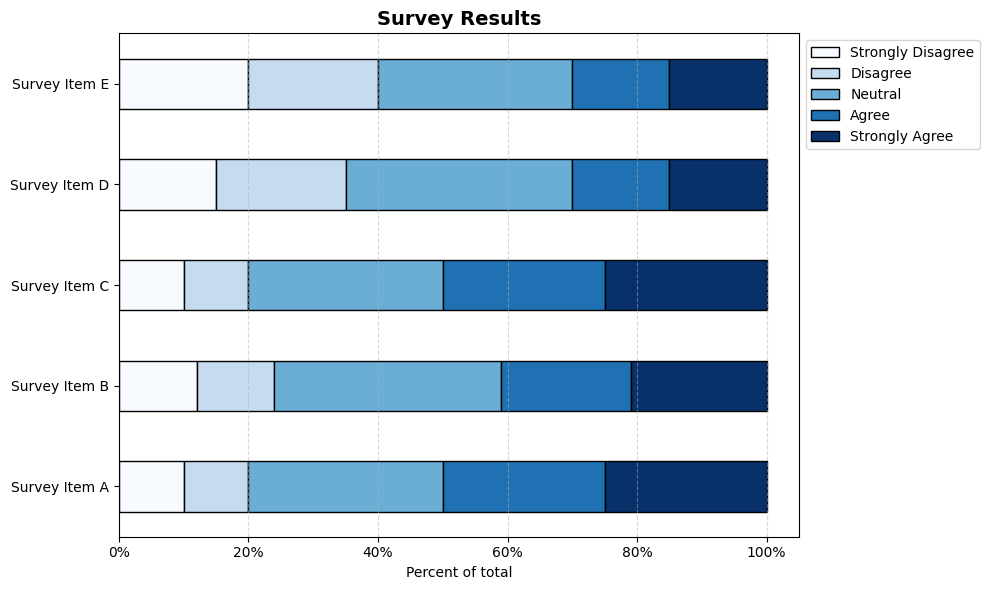

In [14]:
# Approximate data (Percent distribution of survey responses)
data = {
    "Survey Item A": [10, 10, 30, 25, 25],
    "Survey Item B": [12, 12, 35, 20, 21],
    "Survey Item C": [10, 10, 30, 25, 25],
    "Survey Item D": [15, 20, 35, 15, 15],
    "Survey Item E": [20, 20, 30, 15, 15]
}

# Convert to DataFrame
df = pd.DataFrame(data, index=["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"])

# Normalize data so each row sums to 100%
df = df.div(df.sum(axis=0), axis=1) * 100  

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
df.T.plot(kind="barh", stacked=True, colormap="Blues", ax=ax, edgecolor="black")

# Labels & Formatting
ax.set_xlabel("Percent of total")
ax.set_ylabel("")
ax.set_title("Survey Results", fontsize=14, fontweight="bold")
ax.legend(title="", bbox_to_anchor=(1, 1), loc="upper left")  # Move legend outside
plt.xticks(np.arange(0, 101, 20), [f"{x}%" for x in range(0, 101, 20)])
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()